**Loading and Exploring the Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [6]:
# Load the dataset
df = pd.read_csv('edtech_Final.csv')

# Display the first 5 rows
df.head()

,App_Name,installs,score,ratings,reviews,Size (MB),Android_Version,developer,contentRating,containsAds,Released Date
0,Duolingo: language lessons,100000000,4.6,12512116,592133,52.9,4,Duolingo,Everyone,True,29-05-2013
1,Praadis Education Learning App,100000,5.0,4692,6,52.9,4,PRAADIS TECHNOLOGIES INC,Everyone,False,17-01-2019
2,Unacademy Learner App,50000000,3.4,951700,452,52.9,4,Unacademy,Everyone,False,15-02-2017
3,Edmodo,10000000,4.0,459326,15292,52.9,5,"Edmodo, Inc",Everyone,True,02-11-2010
4,Quizlet: Languages & Vocab,10000000,4.7,466157,49990,52.9,4,Quizlet Inc.,Everyone,True,20-08-2013


In [7]:
# Check for missing values
df.isnull().sum()

App_Name           0
installs           0
score              0
ratings            0
reviews            0
Size (MB)          0
Android_Version    0
developer          0
contentRating      0
containsAds        0
Released Date      0
dtype: int64

In [8]:
# Get descriptive statistics

df.describe()

,installs,score,ratings,reviews,Size (MB)
count,8.100000e+01,81.000000,8.100000e+01,81.000000,81.000000
mean,5.079426e+06,3.965432,3.159775e+05,10044.061728,89.216049
std,1.724042e+07,0.661846,1.401577e+06,66207.757045,136.704572
min,5.000000e+00,2.300000,7.100000e+01,2.000000,1.000000
25%,1.000000e+04,3.100000,2.477000e+03,17.000000,22.000000
50%,1.000000e+05,4.200000,4.286200e+04,89.000000,44.000000
75%,1.000000e+06,4.500000,2.484870e+05,339.000000,82.000000
max,1.000000e+08,5.000000,1.251212e+07,592133.000000,752.900000


**Exploratory Data Analysis (EDA)**

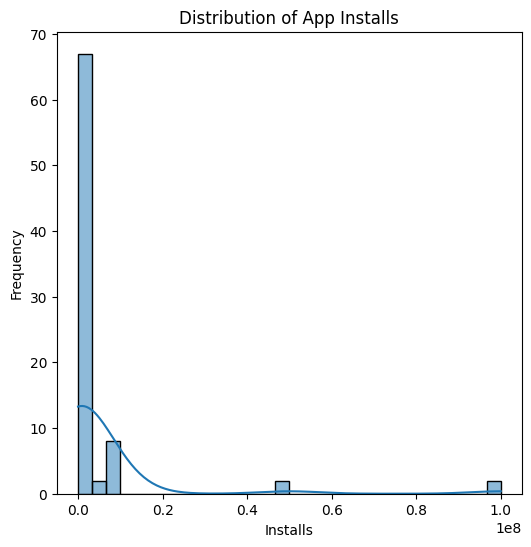

In [24]:
# Histogram of Installs
plt.figure(figsize=(6,6))
sns.histplot(df["installs"],bins=30,kde=True)
plt.title("Distribution of App Installs")
plt.xlabel("Installs")
plt.ylabel("Frequency")
plt.show()

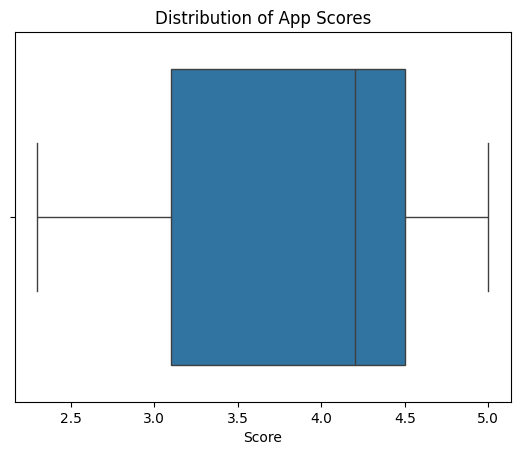

In [11]:
# Box plot of Scores
plt.Figure(figsize=(10,6))
sns.boxplot(x=df["score"])
plt.title("Distribution of App Scores")
plt.xlabel("Score")
plt.show()

**Feature Engineering**

In [16]:
# Categorize installs
df['install_category'] = pd.cut(df['installs'], bins=[0, 100000, 1000000, 100000000], labels=['Low', 'Medium', 'High'])
df['install_category'].value_counts()

install_category
Low       45
Medium    22
High      14
Name: count, dtype: int64

In [17]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['contentRating', 'containsAds'], drop_first=True)

**K-Means Clustering**

Import Required Libraries

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Prepare the Data

In [26]:
# Select features for clustering
X = df[['installs', 'reviews', 'score']]

Normalize the Data

In [27]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Apply K-Means Clustering

In [31]:
# Initialize K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [32]:
# Add cluster labels to the dataset
df['cluster'] = kmeans.labels_

Visualize the Clusters

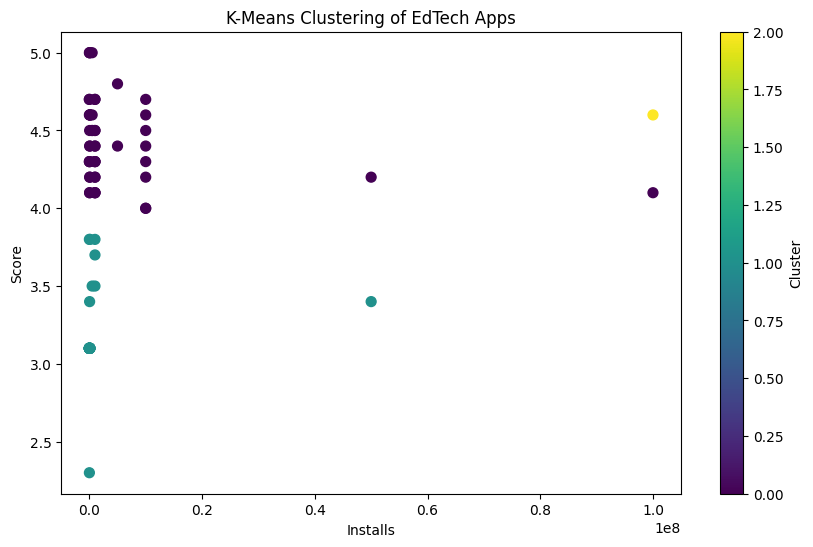

In [33]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['installs'], df['score'], c=df['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of EdTech Apps')
plt.xlabel('Installs')
plt.ylabel('Score')
plt.colorbar(label='Cluster')
plt.show()

**Interpret the Clusters:**

Cluster 0: Apps with low installs and low scores.

Cluster 1: Apps with medium installs and medium scores.

Cluster 2: Apps with high installs and high scores.

In [34]:
df.to_csv('edtech_with_clusters.csv', index=False)